# TensorFlow Intro

In [1]:
#import  relevant libraries
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
#Data generation

#criação de dados falsos com relação linear
#na vida real, pegam-se os dados de uma fonte externa
observations = 1000 #tamanho da dataset que queremos criar

#modelo linear de 2 variaveis f(x,z) = ax + bz + c
#np.random.uniform(low,high,size), pega um valor randomico entre low e high onde cada numero tem uma chance igual de aparecer
#size = (numero de observaçoes x numero de variaveis)
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

#np.colunm_stack(appropriate tuples) pega uma sequencia de arrays de 1 dimensão  e cocatena em um array de 2 dimensões
generated_inputs = np.column_stack((xs,zs))

In [3]:
#create target we will aim on

# targets = f(x,z) = 2*x - 3*z + 5 +ruído
noise = np.random.uniform(-1,1,(observations,1))
generated_targets = 2*xs - 3*zs + 5 + noise

In [4]:
'''TensorFlow gosta de trabalhar com tensores(duuhr) para isso é interessante que os dados que irão ser apresentados sejam 
dados por um numPy file(.npz) que armazenam arrays n-dimensionais. '''
#normalmente há um preprocessamento dos dados para que antes de treinar a rede os dados estejam em .npz

#np.savez(file name, arrays)
np.savez('TF_intro',inputs=generated_inputs,targets=generated_targets)

# Solving with TensorFlow

In [5]:
input_size =2
output_size =1

In [6]:
#começando com a criação de objetos to tf

#placeholder, onde será alimentado com dados
inputs =tf.placeholder(tf.float32,[None,input_size])
targets=tf.placeholder(tf.float32,[None,output_size])
'''float32 indica o tipo de dado que será utilizado
O None indica que não há necessidade de explicitar as dimensões da matriz de inputs 
(não é necessario declarar o numero de observaçoes)'''

#tf.Variable, usado para pesos e biases, mantém os seus valores, coisa que os placeholders não fazem
weights = tf.Variable(tf.random.uniform([input_size,output_size],minval=-0.1,maxval=0.1))
biases = tf.Variable(tf.random.uniform([output_size],minval=-0.1,maxval=0.1))

#tf.matmul(A,B): multiplicação de matrizes A,B, como np.dot(A,B) só q pra tensores
outputs = tf.matmul(inputs,weights)+biases

# Choosing Loss function and optimization algorith

In [7]:
#método que usa a L2 norm loss que é a função custo de erro quadratico minimo(mse)
#tf.losses contem a maioria das funçoes custo
#no aprendizado supervisionado, labels são os valores corretos e predictions são os outputs da rede
mean_loss = tf.losses.mean_squared_error(labels=targets,predictions=outputs) / 2.0

#tf.train cntém a maioria dos métodos otimizadores
optimize = tf.train.GradientDescentOptimizer(learning_rate = 0.05).minimize(mean_loss)

# Prepare for execution

In [8]:
#tf.InteractiveSession() é uma classe do TF que é usada sempre que há requisição de executar algo
sess = tf.InteractiveSession()

### Initialization

In [9]:
#tf.global_variables_initializer() : método que  inicia todos os objetos  marcados como variaveis (weights e biases)
initializer = tf.global_variables_initializer()
sess.run(initializer)

### Loading Training Data

In [10]:
#np.load(file name) carrega dados de um arquivo que se encontra no mesmo diretorio que o arquivo da rede
#(caso contrario especificar o caminho)
training_data = np.load('TF_intro.npz')

### Learning

In [11]:
#e de epoch: each iteration of the dataset
#feed_dict = como o algoritmo será alimentado
#feed_dict = {placeholder1:arquivoDados['labelCcolunaDesejada'], placeholder2:arquivoDados['labelColunaDesejada']}

'''Ao usar sess.run() sempre há um retorno, mean_loss retorna exatamente o que queremos, no entanto optimize nao retorna nada
usar o underline sem nada é um artifício de programação para ignorar o retorno daquela função/método '''

for e in range(100):
    _, curr_loss  =sess.run([optimize,mean_loss],
                            feed_dict={inputs:training_data['inputs'],targets:training_data['targets']})
    print(curr_loss)

208.05229
75.53224
31.525528
16.45118
10.903839
8.543402
7.287453
6.445347
5.783572
5.2199073
4.722873
4.2784157
3.8787405
3.518524
3.193562
2.9002855
2.6355581
2.3965793
2.1808379
1.9860686
1.8102316
1.651487
1.5081719
1.3787866
1.2619776
1.1565208
1.0613152
0.97536236
0.897764
0.8277084
0.76446164
0.7073623
0.6558129
0.6092737
0.567258
0.529326
0.49508074
0.4641642
0.43625247
0.41105378
0.38830432
0.36776575
0.34922358
0.33248362
0.31737068
0.30372694
0.29140896
0.28028828
0.27024865
0.26118487
0.2530021
0.2456145
0.23894519
0.23292397
0.22748789
0.2225802
0.21814953
0.21414955
0.21053843
0.20727815
0.20433488
0.20167759
0.1992786
0.19711271
0.19515738
0.19339207
0.19179848
0.19035968
0.18906076
0.18788803
0.18682933
0.18587352
0.18501069
0.18423164
0.18352835
0.18289329
0.18232013
0.18180262
0.18133542
0.18091357
0.18053274
0.18018897
0.1798786
0.17959839
0.17934541
0.17911701
0.17891082
0.1787247
0.17855662
0.17840494
0.17826793
0.17814423
0.1780326
0.17793183
0.17784084
0.17775868

### Plot Data

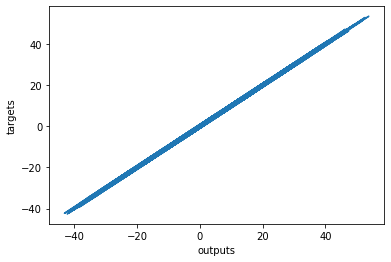

In [12]:
out = sess.run([outputs],
              feed_dict = {inputs: training_data['inputs']})
plt.plot(np.squeeze(out),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()